In [7]:
import numpy as np
from random import random, uniform, randint
from matplotlib import pyplot as plt
import pandas as pd

In [4]:
a = [0]*100

for i in range(1000000):
    a[randint(0, 99)]+=1

In [8]:
from calc import distance, intersection, parallel, angle, orthogonal
from draw import draw
from line import Line
from plane import Plane
from point import Point
from solver import solve
from vector import Vector

__all__ = (
    "Line",
    "Plane",
    "Point",
    "Vector",
    "angle",
    "distance",
    "draw",
    "intersection",
    "orthogonal",
    "parallel",
    "solve",
)

In [9]:
def get_angles(points):
    # вычисление угла
    cnt = points
    num_points = len(cnt)
    angles = []
    for i, point in enumerate(cnt):
        point1 = cnt[i - 1]
        point2 = cnt[i]
        point3 = cnt[(i + 1) % num_points]
        angles.append(int(Vector(point2, point1).angle(Vector(point2, point3))* 180 / np.pi))

    return np.array(angles)

In [10]:
class Cube():
    #куб с вершиной А в нуле координат и заданной длиной ребра, находится в первой полуплоскости для каждй пары осей
    def __init__(self, side=1, center=Point(0.5, 0.5, 0.5)):
        
        
        self.side = side
        self.center = center
        a = side
        
        vec = Point(center - Point(side/2, side/2, side/2))
        
        self.A = Point(0, 0, 0) + vec
        self.B = Point(a, 0, 0) + vec
        self.C = Point(a, a, 0) + vec
        self.D = Point(0, a, 0) + vec
        self.E = Point(0, 0, a) + vec
        self.F = Point(a, 0, a) + vec
        self.G = Point(a, a, a) + vec
        self.H = Point(0, a, a) + vec
        
        self.iterable_points = [self.A, self.B, self.C, self.D, self.E, self.F, self.G, self.H]
        self.names = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H']
        
        self.AB = Line(self.A, self.B)
        self.BC = Line(self.B, self.C)
        self.AD = Line(self.A, self.D)
        self.DC = Line(self.D, self.C)
        
        self.AE = Line(self.A, self.E)
        self.BF = Line(self.B, self.F)
        self.CG = Line(self.C, self.G)
        self.DH = Line(self.D, self.H)
        
        self.EF = Line(self.E, self.F)
        self.EH = Line(self.E, self.H)
        self.FG = Line(self.F, self.G)
        self.HG = Line(self.H, self.G)
        
        self.iterable_edges = [self.AB, self.BC, self.AD, self.DC, self.AE, self.BF,
                               self.CG, self.DH, self.EF, self.EH, self.FG, self.HG]
        
        
        
    def intersection_with_plane(self, plane):
        boundaries = self.iterable_edges

        intersections = filter(None, map(lambda edge: intersection(edge, plane), boundaries))
        intersections = filter(lambda x: not isinstance(x, Line), intersections)
        intersections = list(set(intersections))

        # Filter out any out of bounds intersections
        def in_bounds(point):
            # intersect is actually (num, point)
            return (
                # <3 Python's comparison operator
                self.A.x <= point.x <= self.G.x and
                self.A.y <= point.y <= self.G.y and
                self.A.z <= point.z <= self.G.z
            )
        intersections = list(filter(in_bounds, intersections))
        
        
        if intersections:
            polygon = [intersections.pop()]
            while intersections:
                last = polygon[-1]
                distances = [distance(last, x) for x in intersections]
                # We're only interested in the index of the next point,
                # this min function returns the minimum (index, distance)
                # tuple...
                successor = min(enumerate(distances), key=lambda x: x[1])
                # ...but we only need the index :)
                successor = successor[0]
                polygon.append(intersections.pop(successor))

            return polygon
        else:
            return []

In [32]:
class CubeHalf():
    #половина куб с вершиной А в нуле координат и заданной длиной ребра, находится в первой полуплоскости для каждй пары осей
    def __init__(self):
        
        side=1
        center=Point(0.5, 0.5, 0.5)
        self.side = side
        self.center = center
        a = side
        
        vec = Point(center - Point(side/2, side/2, side/2))
        
        self.A = Point(0, 0, 0) + vec
        self.B = Point(a, 0, 0) + vec
        self.C = Point(0, a, 0) + vec
        self.D = Point(0, 0, a) + vec
        self.E = Point(a, 0, a) + vec
        self.F = Point(0, a, a) + vec
        
        self.iterable_points = [self.A, self.B, self.C, self.D, self.E, self.F]
        self.names = ['A', 'B', 'C', 'D', 'E', 'F']
        
        self.AB = Line(self.A, self.B)
        self.BC = Line(self.B, self.C)
        self.AC = Line(self.A, self.C)
        
        self.AD = Line(self.A, self.D)
        self.BE = Line(self.B, self.E)
        self.CF = Line(self.C, self.F)
        
        self.DE = Line(self.D, self.E)
        self.DF = Line(self.D, self.F)
        self.FE = Line(self.F, self.E)
        
        self.ABD = Plane(self.A, self.B, self.E)
        self.ACD = Plane(self.A, self.C, self.D)
        self.CBE = Plane(self.C, self.B, self.E)
        
        self.ABC = Plane(self.A, self.B, self.C)
        self.DEF = Plane(self.D, self.E, self.F)
        

        
        self.iterable_edges = [self.AB, self.BC, self.AC, self.AD, self.BE, self.CF,
                               self.DE, self.DF, self.FE]
        
        self.iterable_facets = [self.ABD, self.ACD, self.CBE, self.ABC, self.DEF]
        
        
        
    def intersection_with_plane(self, plane):
        boundaries = self.iterable_edges

        intersections = filter(None, map(lambda edge: intersection(edge, plane), boundaries))
        intersections = filter(lambda x: not isinstance(x, Line), intersections)
        intersections = list(set(intersections))

        # Filter out any out of bounds intersections
        def in_bounds(point):
            # intersect is actually (num, point)
            return (
                self.A.x <= point.x <= self.B.x and
                self.A.y <= point.y <= self.C.y and
                point.y <= point.x + 1 and
                self.A.z <= point.z <= self.D.z
            )
        intersections = list(filter(in_bounds, intersections))
        
        
        if intersections:
            point = intersections[0]
            polygon = []
            polygon.append(point)
            del intersections[0]

            while intersections:
                for i, p in enumerate(intersections):
                    flag = False
                    for plane in self.iterable_facets:
                        if (p in plane) and (point in plane):
                            polygon.append(p)
                            del intersections[i]
                            point = p
                            flag = True
                            break
                    if flag:
                        break
            return polygon
        else:
            return []
        
#         if intersections:
#             polygon = [intersections.pop()]
#             while intersections:
#                 last = polygon[-1]
#                 distances = [distance(last, x) for x in intersections]
#                 # We're only interested in the index of the next point,
#                 # this min function returns the minimum (index, distance)
#                 # tuple...
#                 successor = min(enumerate(distances), key=lambda x: x[1])
#                 # ...but we only need the index :)
#                 successor = successor[0]
#                 polygon.append(intersections.pop(successor))

#             return polygon
#         else:
#             return []

In [33]:
def make_random_plane(n=1):
    #в кубе с левой нижней вершиной 0,0,0 а правой верхней n,n,n
    center = Point(n/2, n/2, n/2)
    cube = Cube(side=n, center=center)
    #генерируем два угла k1 и k2
    k1, k2 = np.tan(uniform(0, np.pi)), np.tan(uniform(0, np.pi))
    #рассматриваем случаи
    if k1 >= 0:
        xm = 0
        ym = 0
    else:
        xm = n
        ym = n
        k1 = -k1
    m1 = n/2-2**(0.5)/2*n*k1
    v1 = Vector(center, Point(xm, ym, m1))
    
    if k2 >= 0:
        xn = 0
        yn = n
    else:
        xn = n
        yn = 0
        k2 = -k2
    m2 = n/2-2**(0.5)/2*n*k2
    v2 = Vector(center, Point(xn, yn, m2))
    
    #m1 и m2 - потенциальные минимумы
    
    if m1 <= m2:
        x = xm
        y = ym
        m = m1
    else:
        x = xn
        y = yn
        m = m2
    
    #генерируем "сдвиг"
    z = uniform(2*m - n, n)
    #возвращаем плоскость по точке и двум векторам
    return Plane(Point(x, y, z), v1, v2)

In [34]:
def generate_random_plane_angles(cube=CubeHalf()):
    
    plane = make_random_plane(n=1)
    points_intersection = cube.intersection_with_plane(plane)
    if len(points_intersection) != 0:
        return get_angles(points_intersection)
    else:
        return []

In [35]:
def generates_n_plates(n=1000):
    
    cube = CubeHalf()
    angles = [0]*181
    
    for i in range(n):
        angs = generate_random_plane_angles(cube=cube)
        if len(angs) != 0:
            for ang in angs:
                angles[ang] += 1
    
    return list(np.array(angles)/np.sum(angles))

In [36]:
def generate_vertex_distribution(n=1000):
    cube = CubeHalf()
    
    vertex = [0]*7
    for i in range(n):
        angs = generate_random_plane_angles(cube)
        vertex[len(angs)] += 1
    
    return vertex    

In [16]:
distr = generates_n_plates(100000)

print(np.array(distr).argmax())

plt.plot(distr, 'bo')

KeyboardInterrupt: 

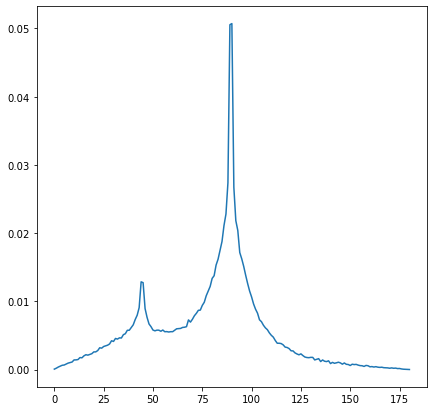

In [17]:
plt.figure(figsize=(7,7))
plt.plot(generates_n_plates(50000))

Wall time: 48 s


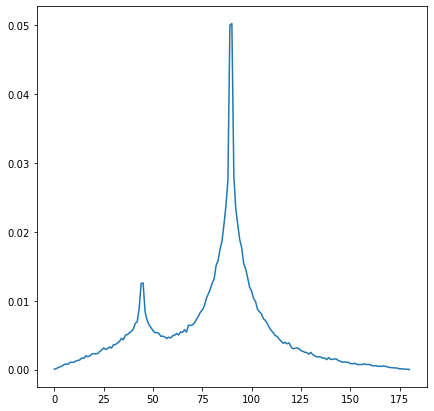

In [40]:
%%time
plt.figure(figsize=(7,7))
plt.plot(generates_n_plates(50000))

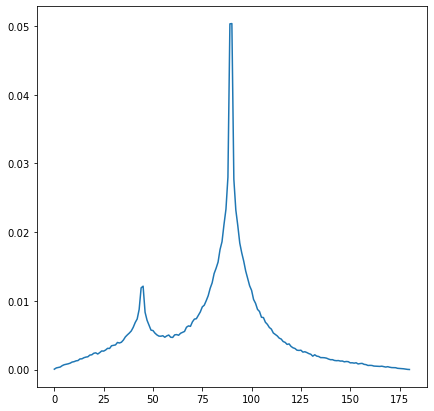

Wall time: 1min 32s


In [41]:
%%time
plt.figure(figsize=(7,7))
plt.plot(generates_n_plates(100000))
plt.show()

In [26]:
def intersections_to_polygon(intersections, figure=CubeHalf()):
    '''
    функция из точек пересечения сечения с многогранником(в случайном порядке) возвращает 
    последовательный обход вершин многоугольника
    '''
    #если нет пересечений
    if len(intersections) == 0:
        return []
    
    
    point = intersections[0]
    polygon = []
    polygon.append(point)
    del intersections[0]
    
    while intersections:
        for i, p in enumerate(intersections):
            flag = False
            for plane in figure.iterable_facets:
                #проверяем находятся ли две точки в одной плоскости
                if (p in plane) and (point in plane):
                    polygon.append(p)
                    del intersections[i]
                    point = p
                    flag = True
                    break
            if flag:
                break
    return polygon

In [29]:
inter = [Point(0.0, 0.6706928709324035, 0.0), Point(0.0, 1.0, 0.0459017048929732), Point(0.13739374113609365, 0.0, 0.0), Point(1.0, 0.0, 0.5869444894620444)]

In [31]:
inter = [Point(0.0, 0.6706928709324035, 0.0), Point(0.0, 1.0, 0.0459017048929732), Point(0.13739374113609365, 0.0, 0.0), Point(1.0, 0.0, 0.5869444894620444)]
get_angles(intersections_to_polygon(inter)).sum()


357

In [ ]:
ch = CubeHalf()
for i in range(50):
    M = Point(random(), random(), random())
    N = Point(random(), random(), random())
    K = Point(random(), random(), random())
    plane = Plane(M, N, K)
    get_angles(ch.intersection_with_plane(plane))

In [9]:
plane = Plane(Point(1, 0, 0), Point(0, 0, 0.5), Point(0, 1, 1.7))

In [44]:
#проверяю что функция правильно находит многогранники на сумму углов

ch = CubeHalf()
for i in range(50):
    M = Point(random(), random(), random())
    N = Point(random(), random(), random())
    K = Point(random(), random(), random())
    plane = Plane(M, N, K)
    print(len(get_angles(ch.intersection_with_plane(plane))), get_angles(ch.intersection_with_plane(plane)).sum(), get_angles(ch.intersection_with_plane(plane)))

3 178 [89 40 49]
4 358 [89 90 99 80]
5 537 [133  83  96 113 112]
3 178 [43 43 92]
4 358 [ 87 107  72  92]
4 358 [ 92  87 105  74]
4 358 [87 92 91 88]
3 179 [25 86 68]
3 178 [64 16 98]
4 358 [ 42  57 155 104]
3 179 [87 39 53]
4 358 [ 99 101  89  69]
4 358 [90 89 92 87]
3 179 [51 43 85]
3 178 [94 45 39]
4 358 [95 92 87 84]
5 537 [ 77 142 109 107 102]
4 358 [ 66  35  97 160]
3 179 [28 63 88]
5 538 [121 106  98  81 132]
3 178 [46 89 43]
3 179 [91 79  9]
4 358 [ 86  86  58 128]
4 358 [83 86 93 96]
4 358 [93 91 88 86]
4 358 [103 140  74  41]
5 537 [ 86 120 128 110  93]
4 359 [131 129  49  50]
4 358 [90 89 89 90]
4 358 [89 88 91 90]
4 358 [ 84  88 118  68]
4 358 [90 91 88 89]
3 179 [35 48 96]
4 357 [ 94 122  49  92]
4 358 [90 89 90 89]
4 358 [ 40 101 155  62]
4 358 [90 90 89 89]
4 358 [ 42 104 103 109]
5 538 [107 103 105  74 149]
4 358 [115  59  64 120]
4 358 [ 56 138 116  48]
3 178 [88 48 42]
4 358 [96 97 82 83]
5 537 [104 110 103  76 144]
4 358 [97 91 88 82]
4 358 [98 92 87 81]
3 178 [59 24

In [45]:
generate_vertex_distribution()

[130, 0, 0, 354, 433, 83, 0]

In [47]:
a = np.array([354, 433, 83])
a/sum(a)

array([0.40689655, 0.49770115, 0.0954023 ])